In [2]:
# import the necessary packages
import numpy as np
import argparse
import cv2
from scipy import misc
import os

In [3]:
# User Inputs
dir_name = r'C:\Users\ankuarora\Desktop\Client\2017_05_CogEx\2017_07_R2Implementation\SampleForms'
in_form = '223345.png'

In [4]:
image = cv2.imread(os.path.join(dir_name, in_form))

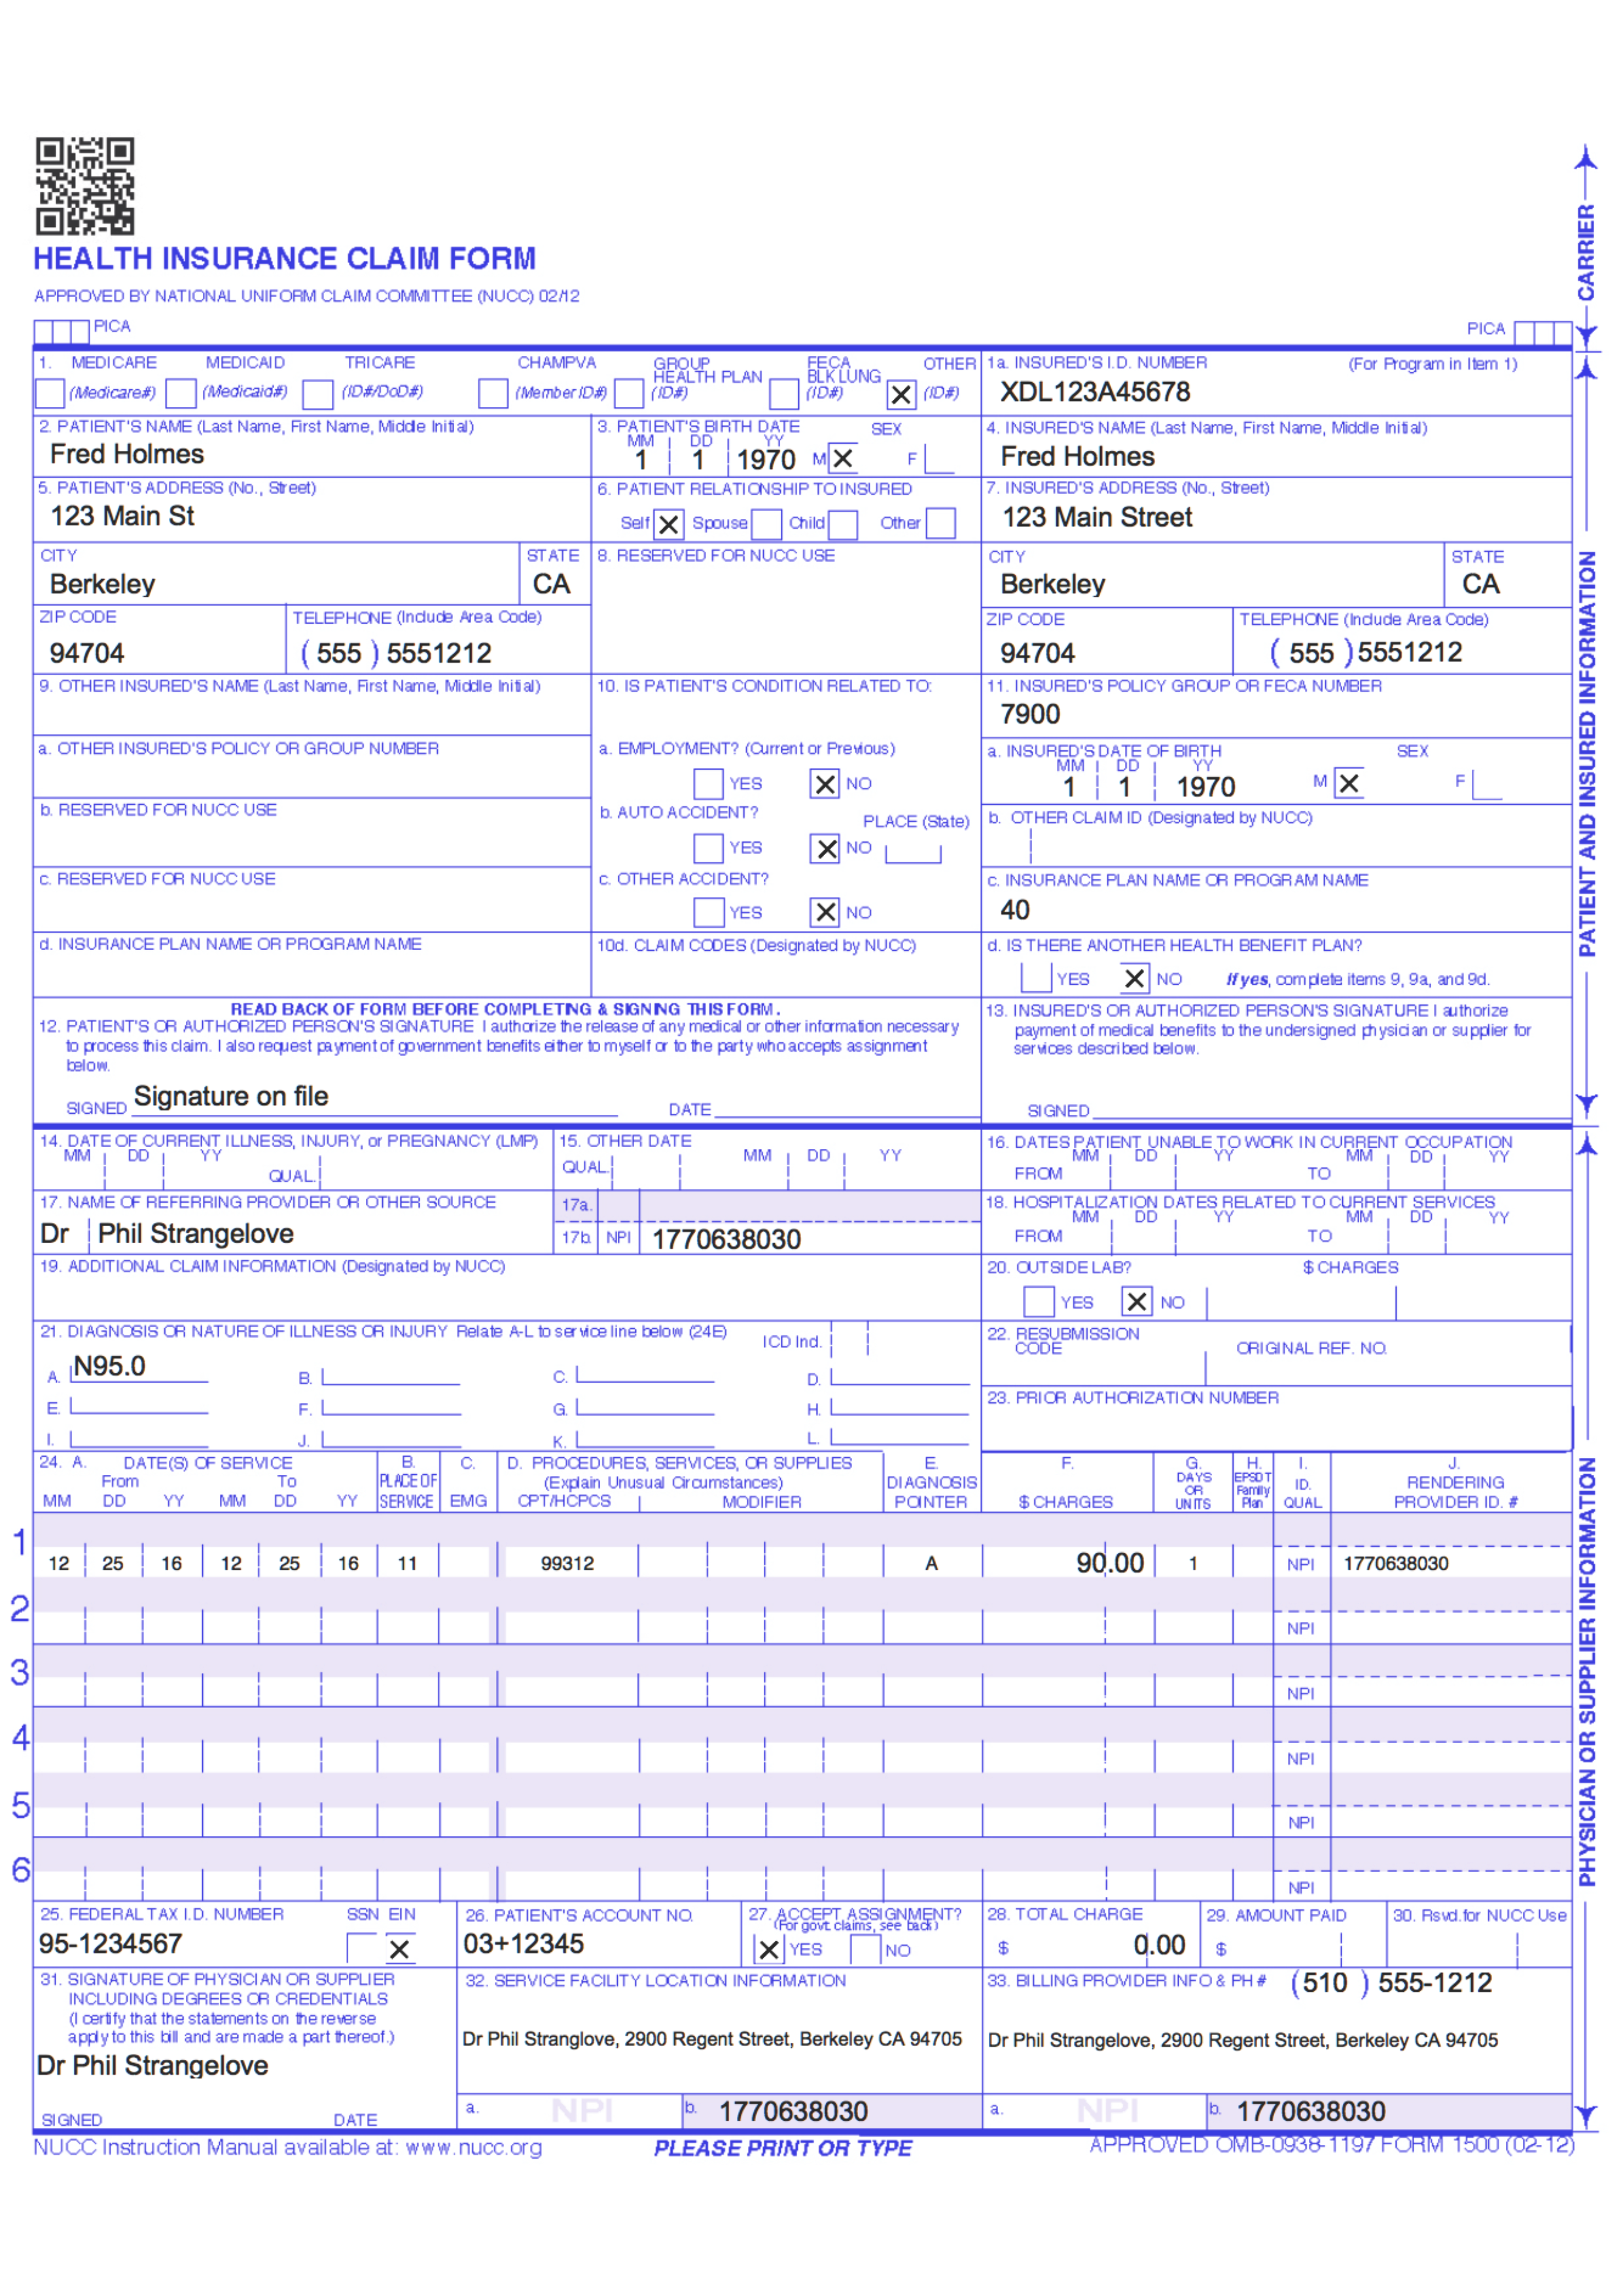

In [5]:
misc.toimage(image)

In [6]:
# convert the image to grayscale and flip the foreground and background to ensure foreground is now "white" and 
# the background is "black"
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

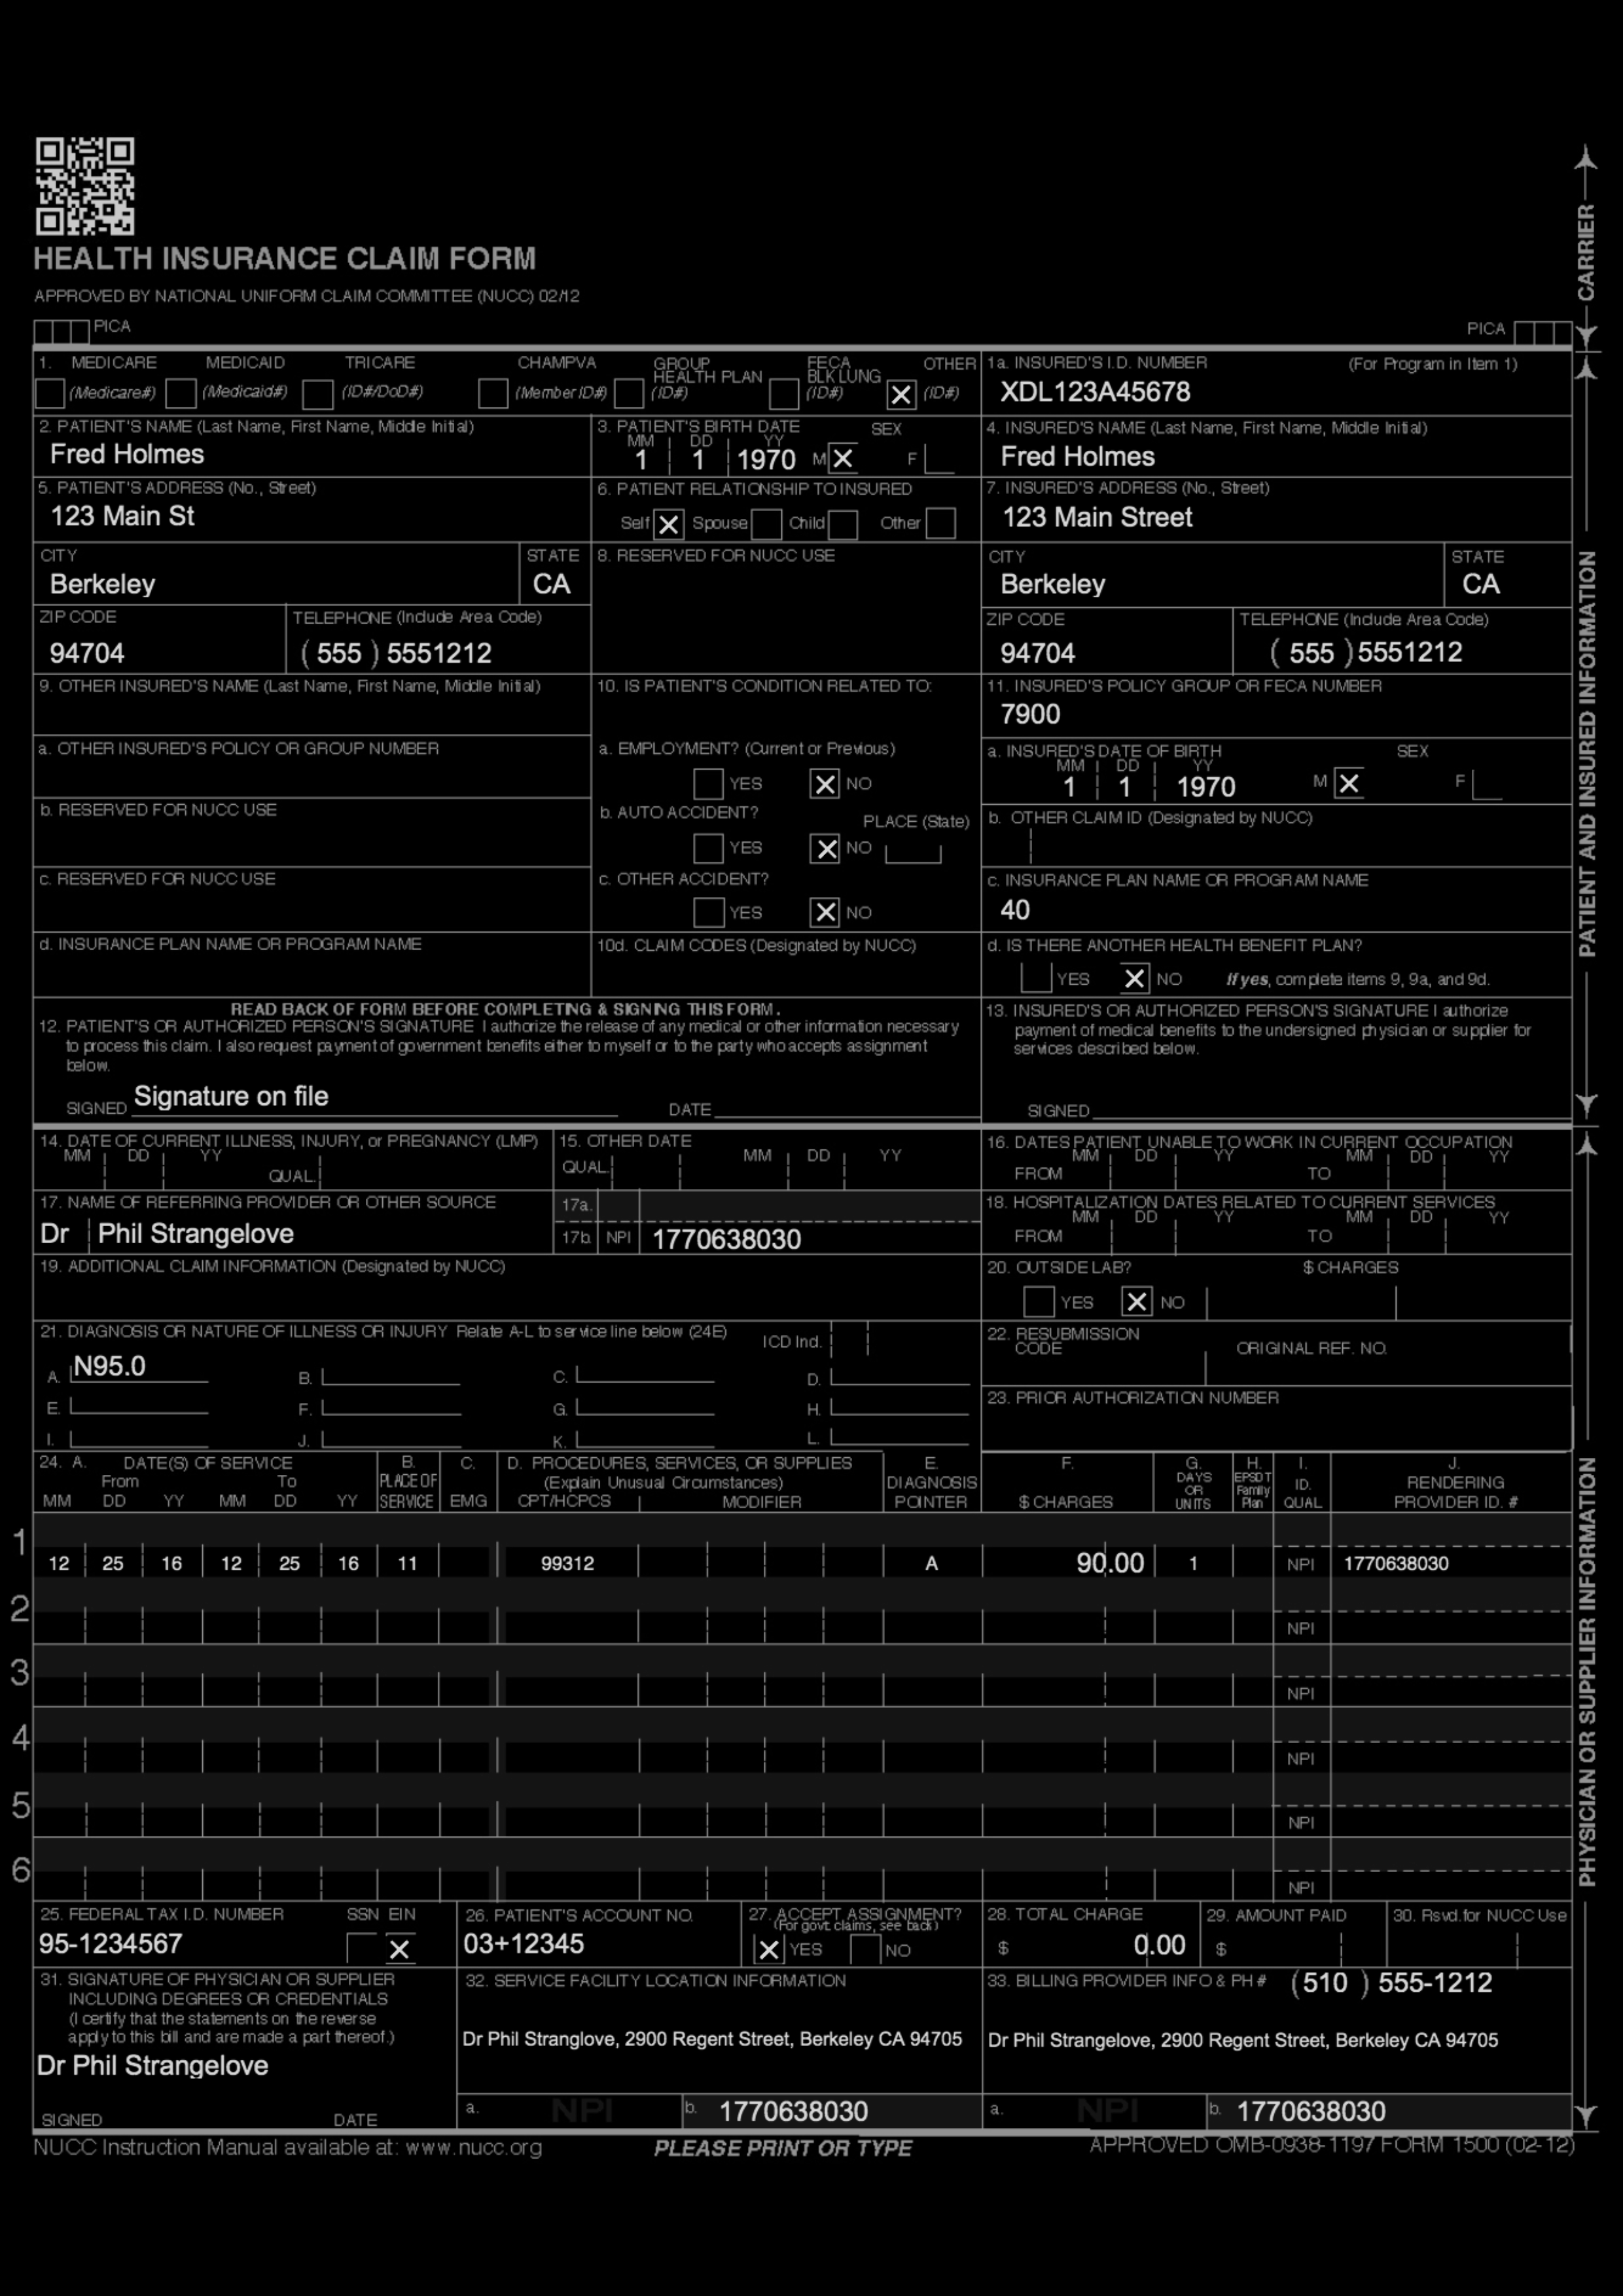

In [7]:
misc.toimage(gray)

In [8]:
# threshold the image, setting all foreground pixels to 255 and all background pixels to 0
thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

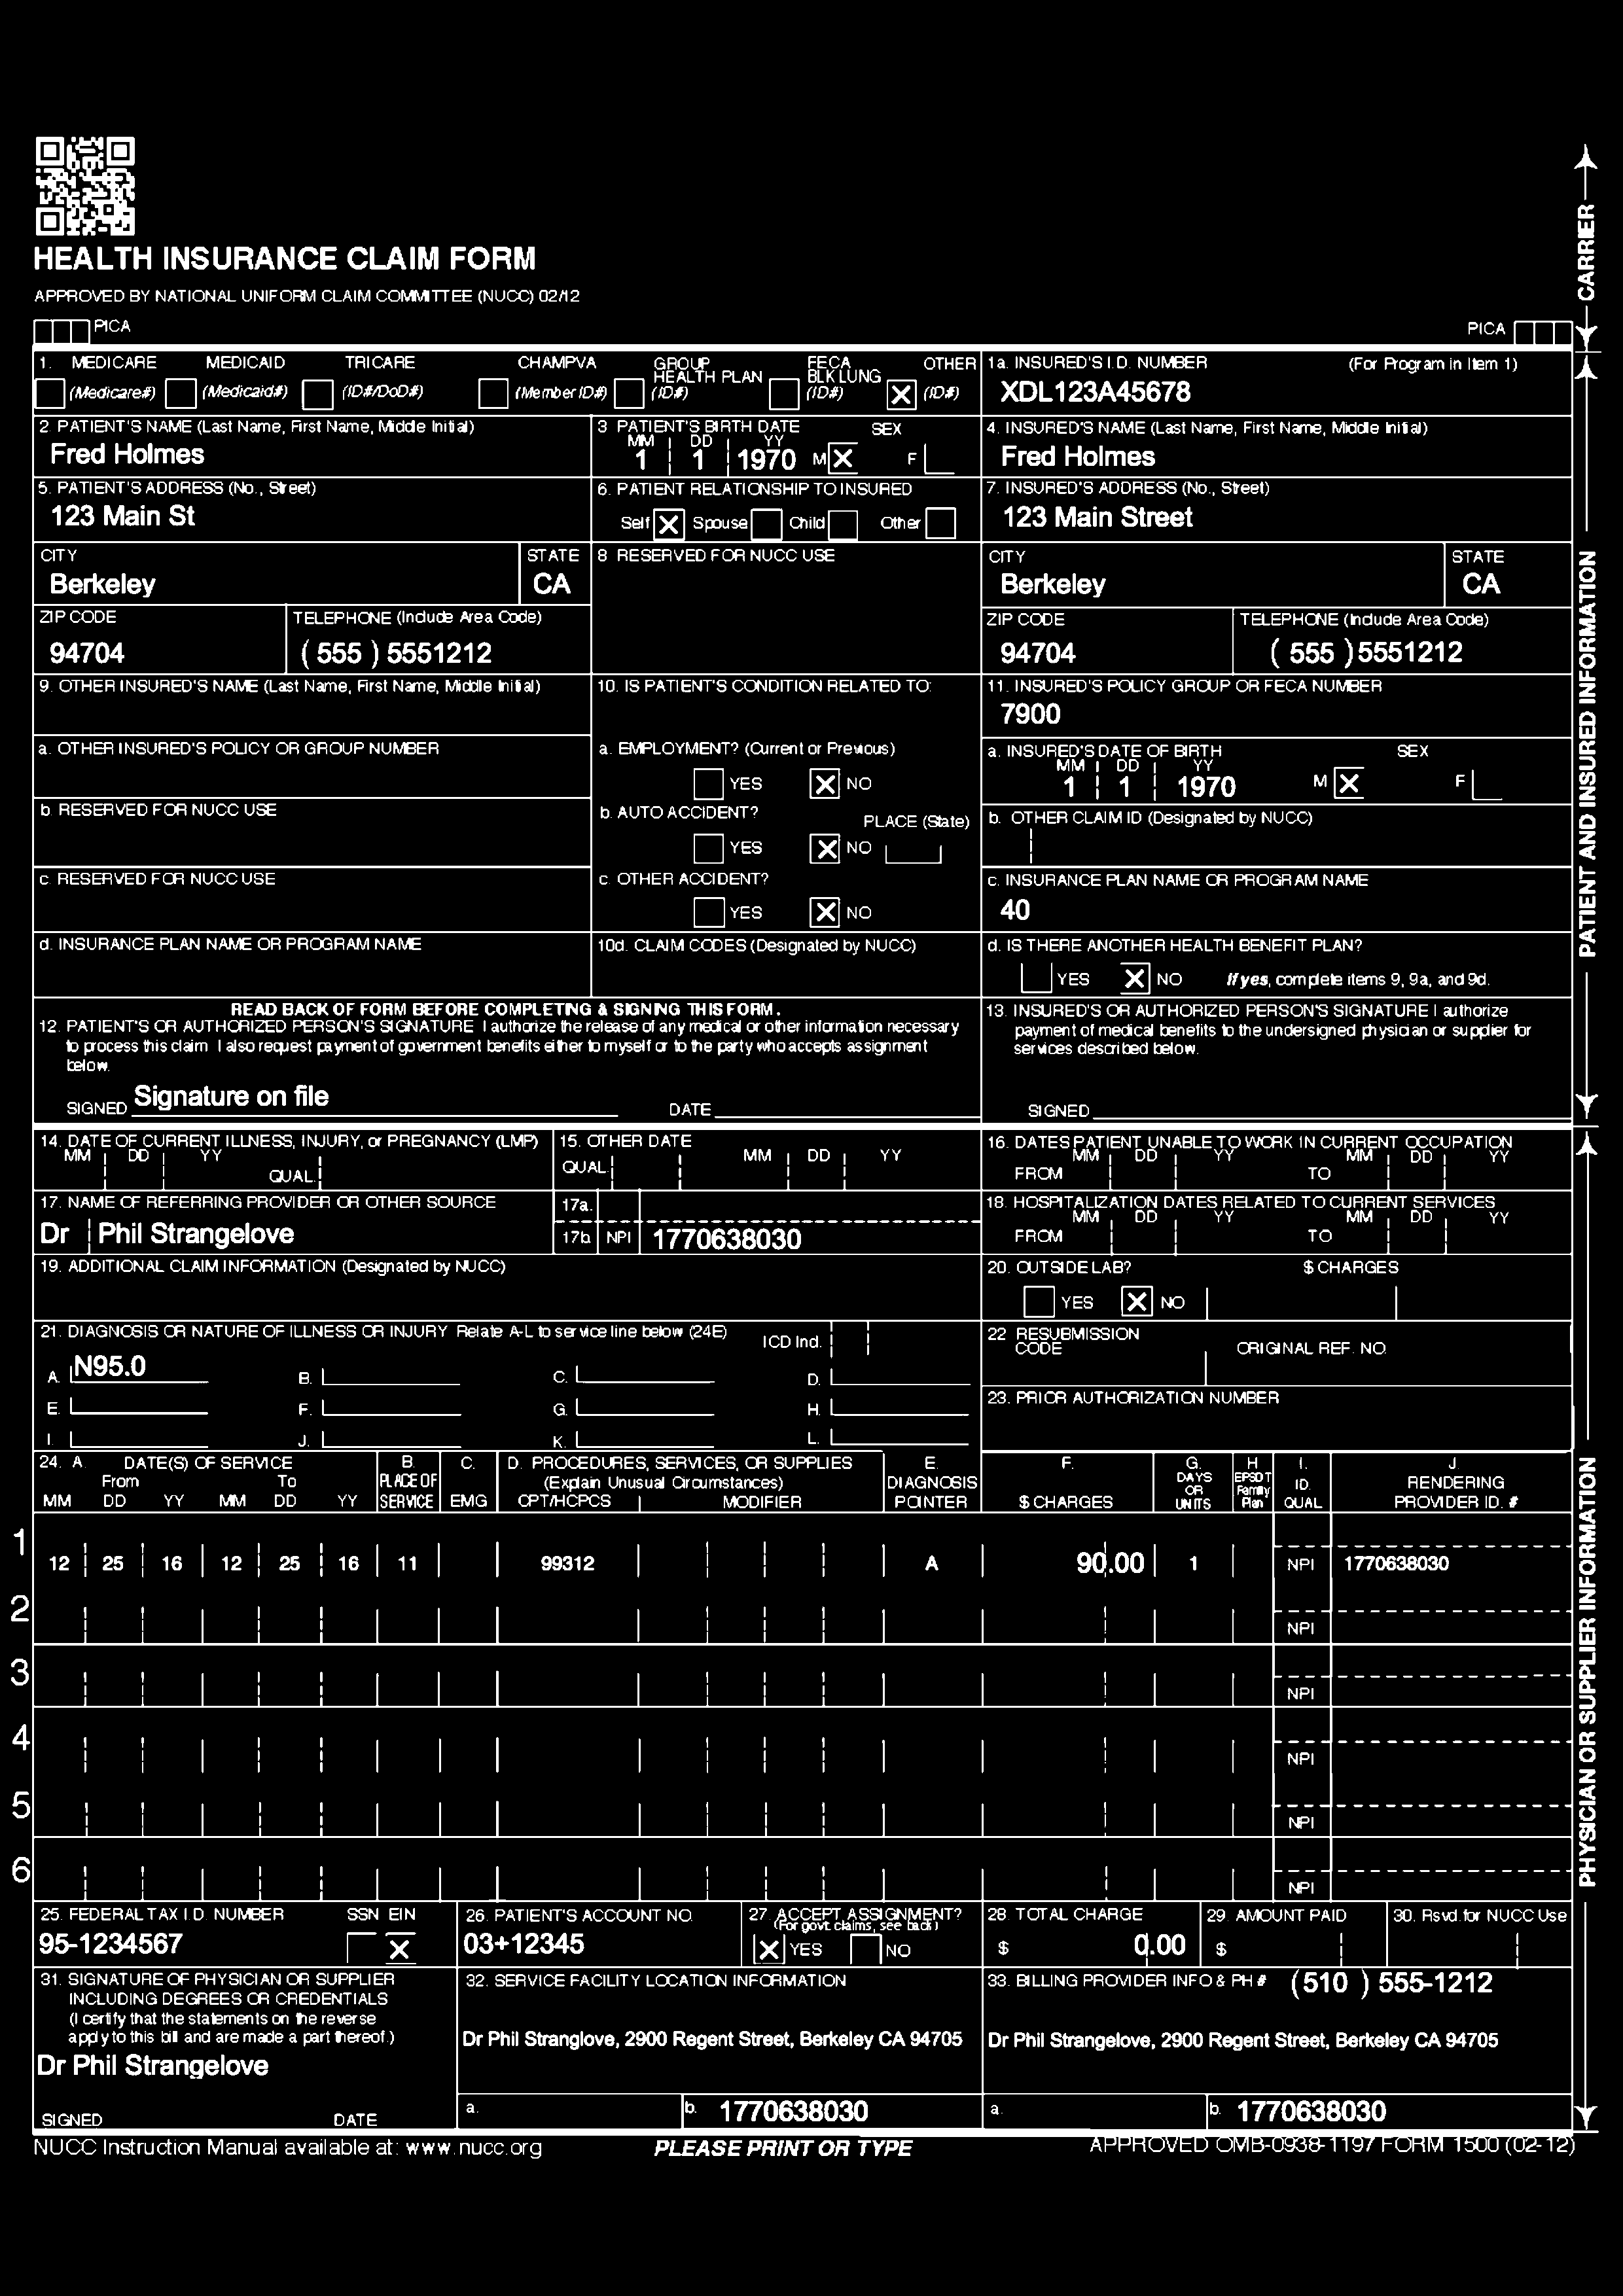

In [9]:

misc.toimage(thresh)

In [10]:
# grab the (x, y) coordinates of all pixel values that are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all coordinates
coords = np.column_stack(np.where(thresh > 0))

In [11]:
coords

array([[ 209,   56],
       [ 209,   57],
       [ 209,   58],
       ..., 
       [3298,  820],
       [3298,  821],
       [3298,  822]], dtype=int64)

In [14]:
angle = cv2.minAreaRect(coords)[-1]
print (angle)

-0.08425843715667725


In [19]:
# the `cv2.minAreaRect` function returns values in the range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we need to add 90 degrees to the angle
if angle < -45:
    angle = -(90 + angle)
# otherwise, just take the inverse of the angle to make it positive
else:
    angle = -angle

# rotate the image to deskew it
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

In [25]:
misc.imsave(os.path.join(dir_name, in_form.replace('.png','') + '_processed.png'), rotated)

In [24]:
# draw the correction angle on the image so we can validate it
# cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# show the output image
# print("[INFO] angle: {:.3f}".format(angle))
# cv2.imshow("Input", image)
# cv2.imshow("Rotated", rotated)
# cv2.imwrite('ScannedSample_Rotated.png',rotated)
# cv2.waitKey(0)